# Data Exploration

---

# Table of Contents
### [1 Setup](#setup)
### [2 Data Generation](#data_generation)
### [3 Data Exploration](#data_exploration)
* [3.1 Consumer Data](#consumer_data_viz)
* [3.2 Product Data](#product_data_viz)
* [3.3 Transaction Data](#transaction_data_viz)

---

## 1 Setup <a id="setup"></a>

This section includes necessary library imports and the setting of the random seed for reproducibility of the results.

In [1]:
import warnings
warnings.filterwarnings("ignore")

# Data generation
from pathlib import Path
import sys

# Data processing
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ROOT = Path.cwd().resolve().parent      # repo root (..)
DATA_DIR = ROOT / "data"
sys.path.insert(0, str(ROOT / "src"))   # add src to import path

In [3]:
from datagen.build_data import generate_and_read_data
from datagen.constants import N_CONSUMERS, N_PRODUCTS, SIZES

In [4]:
# Random seed
np.random.seed(111)

---

## 2 Data Generation <a id="data_generation"></a>

This section includes reading or creating the synthetic data used for the exploration.

In [5]:
dfs = generate_and_read_data(out_dir=DATA_DIR, n_consumers=N_CONSUMERS, n_products=N_PRODUCTS)

In [6]:
consumer_features = dfs["consumers"]
product_features = dfs["products"]
transaction_df = dfs["transactions"]

---

## 3 Data Exploration <a id="data_exploration"></a>

This section includes visualizations to explore and better understand the data.

### 3.1 Consumer Data <a id="consumer_data_viz"></a>

#### Descriptive Statistics

In [7]:
consumer_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   consumer_id                   1000 non-null   object        
 1   gender                        1000 non-null   object        
 2   country                       1000 non-null   object        
 3   age                           1000 non-null   int64         
 4   upper_size                    1000 non-null   object        
 5   lower_size                    1000 non-null   object        
 6   shoe_size                     1000 non-null   float64       
 7   consumer_tolerance_too_small  1000 non-null   float64       
 8   consumer_tolerance_too_large  1000 non-null   float64       
 9   start_date                    1000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 78.2+ KB


In [8]:
consumer_features.describe()

,age,shoe_size,consumer_tolerance_too_small,consumer_tolerance_too_large,start_date
count,1000.000000,1000.000000,1000.000000,1000.000000,1000
mean,34.359000,10.572000,-0.254250,0.328030,2021-07-04 20:48:28.800000
min,18.000000,4.500000,-0.700000,-0.200000,2021-01-01 00:00:00
25%,28.000000,9.000000,-0.380000,0.150000,2021-04-02 00:00:00
50%,34.000000,10.500000,-0.260000,0.320000,2021-07-05 00:00:00
75%,41.000000,12.125000,-0.120000,0.510000,2021-10-06 00:00:00
max,62.000000,14.500000,0.190000,0.840000,2021-12-31 00:00:00
std,9.416304,2.321574,0.183282,0.232858,NaN


In [9]:
consumer_features.head()

,consumer_id,gender,country,age,upper_size,lower_size,shoe_size,consumer_tolerance_too_small,consumer_tolerance_too_large,start_date
0,c_1,Female,Japan,50,S,S,8.0,-0.39,0.14,2021-03-07
1,c_2,Male,USA,35,L,L,11.5,-0.31,0.22,2021-07-31
2,c_3,Female,Japan,35,L,L,11.5,-0.33,0.31,2021-09-05
3,c_4,Female,UK,20,XL,XL,14.0,0.04,0.27,2021-01-17
4,c_5,Female,Germany,34,XL,L,13.5,-0.15,0.09,2021-09-15


#### Demographic Distribution

<Axes: xlabel='gender'>

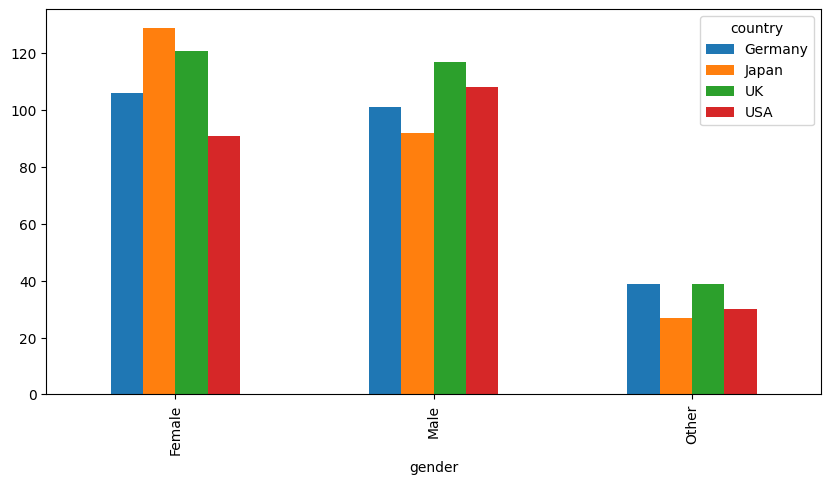

In [10]:
consumer_features[['gender', 'country']].value_counts().unstack().plot(kind = 'bar', figsize = (10,5))

#### Age Distribution

<Axes: xlabel='age', ylabel='Count'>

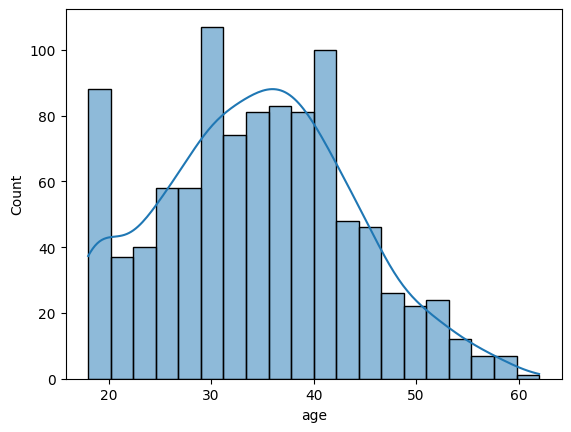

In [11]:
sns.histplot(consumer_features['age'], bins = 20, kde = True)

#### Size Tolerance Distribution by Gender

<Axes: xlabel='gender', ylabel='consumer_tolerance_too_small'>

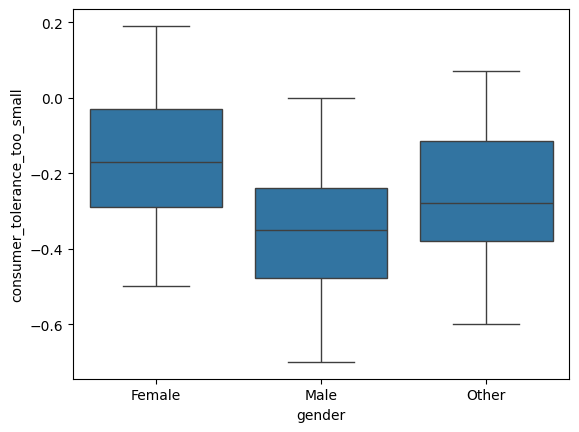

In [12]:
sns.boxplot(data = consumer_features, x = 'gender', y = 'consumer_tolerance_too_small')

<Axes: xlabel='gender', ylabel='consumer_tolerance_too_large'>

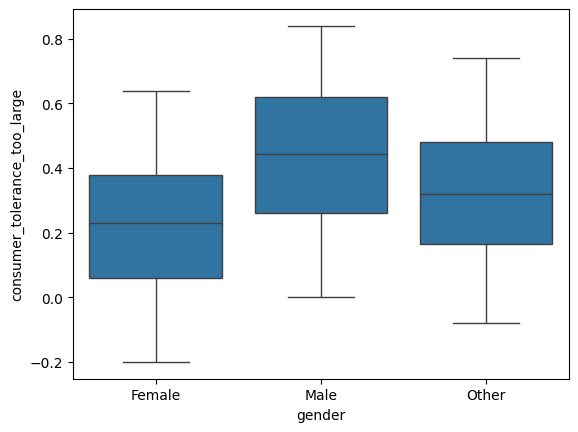

In [13]:
sns.boxplot(data = consumer_features, x = 'gender', y = 'consumer_tolerance_too_large')

### 3.2 Product Data <a id="product_data_viz"></a>

#### Descriptive Statistics

In [14]:
product_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1000 non-null   object 
 1   section              1000 non-null   object 
 2   product_type         1000 non-null   object 
 3   fit_type             1000 non-null   object 
 4   size_accuracy        1000 non-null   object 
 5   available_countries  1000 non-null   object 
 6   material             1000 non-null   object 
 7   fit_offset           1000 non-null   float64
dtypes: float64(1), object(7)
memory usage: 62.6+ KB


In [15]:
product_features.describe()

,fit_offset
count,1000.00000
mean,0.01263
std,0.50369
min,-1.28000
25%,-0.40000
50%,0.02000
75%,0.41250
max,1.31000


In [16]:
product_features.head()

,product_id,section,product_type,fit_type,size_accuracy,available_countries,material,fit_offset
0,a_1,Other,Sportswear,regular,runs large,[USA],Recycled Polyester,0.27
1,a_2,Other,T-Shirts & Tops,slim,true to size,[USA],Recycled Polyester,-0.39
2,a_3,Male,Sportswear,slim,true to size,"[Japan, Germany]",Aeroready Technology,-0.43
3,a_4,Female,Sportswear,loose,true to size,"[Japan, USA]",Aeroready Technology,0.47
4,a_5,Male,Shoes,regular,true to size,[Germany],Recycled Polyester,0.03


#### Product Type Distribution

<Axes: xlabel='count', ylabel='product_type'>

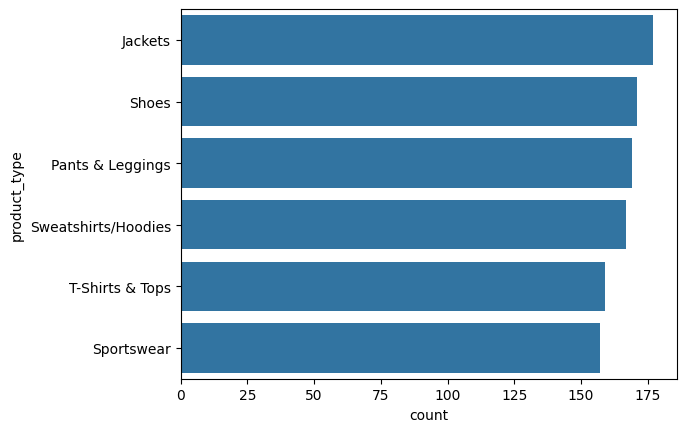

In [17]:
sns.countplot(data = product_features, y = 'product_type', order = product_features['product_type'].value_counts().index)

#### Fit Offset Distribution

<Axes: xlabel='fit_offset', ylabel='Count'>

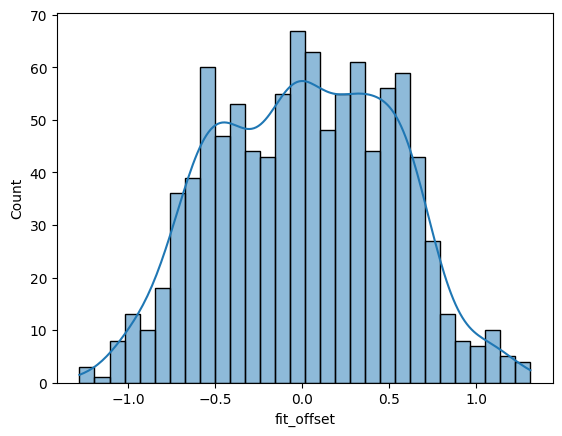

In [18]:
sns.histplot(product_features['fit_offset'], bins = 30, kde = True)

#### Fit Type vs. Size Accuracy

<Axes: xlabel='fit_type'>

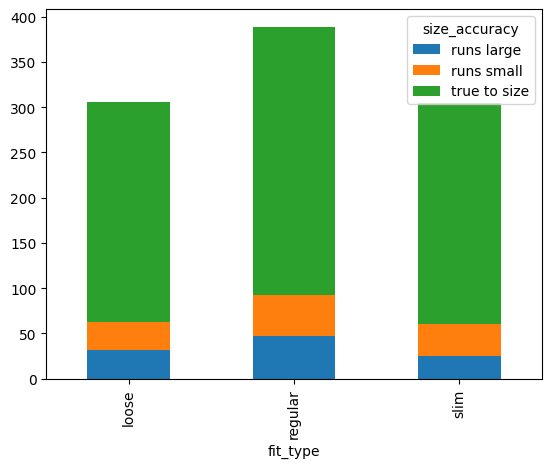

In [19]:
pd.crosstab(product_features['fit_type'], product_features['size_accuracy']).plot(kind = 'bar', stacked = True)

### 3.3 Transaction Data <a id="transaction_data_viz"></a>

#### Descriptive Statistics

In [20]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4760 entries, 0 to 4759
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   consumer_id       4760 non-null   object        
 1   product_id        4760 non-null   object        
 2   purchased_size    4760 non-null   object        
 3   fit_outcome       4760 non-null   object        
 4   transaction_date  4760 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(4)
memory usage: 186.1+ KB


In [21]:
transaction_df.describe()

,transaction_date
count,4760
mean,2021-12-06 17:55:27.731092480
min,2021-01-12 00:00:00
25%,2021-08-18 00:00:00
50%,2021-12-04 00:00:00
75%,2022-03-14 00:00:00
max,2023-05-29 00:00:00


In [22]:
transaction_df.head()

,consumer_id,product_id,purchased_size,fit_outcome,transaction_date
0,c_1,a_326,S,too small,2021-04-28
1,c_1,a_813,S,fit,2021-06-04
2,c_1,a_13,S,fit,2021-07-01
3,c_1,a_599,S,too small,2021-07-18
4,c_1,a_670,XS,too small,2021-08-26


#### Fit Outcome Distribution

<Axes: xlabel='fit_outcome', ylabel='count'>

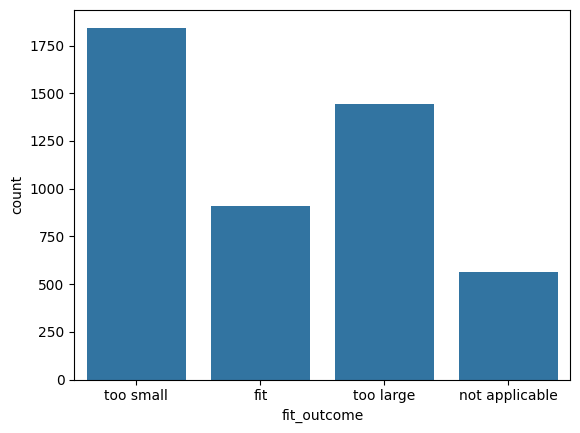

In [23]:
sns.countplot(data = transaction_df, x = 'fit_outcome')

#### Sequence Length Distribution

In [24]:
consumer_purchase_counts = transaction_df['consumer_id'].value_counts()

In [25]:
consumer_purchase_counts.describe()

count    1000.000000
mean        4.760000
std         2.130009
min         1.000000
25%         3.000000
50%         5.000000
75%         6.000000
max        11.000000
Name: count, dtype: float64

The majority of consumers have around 5 transactions.

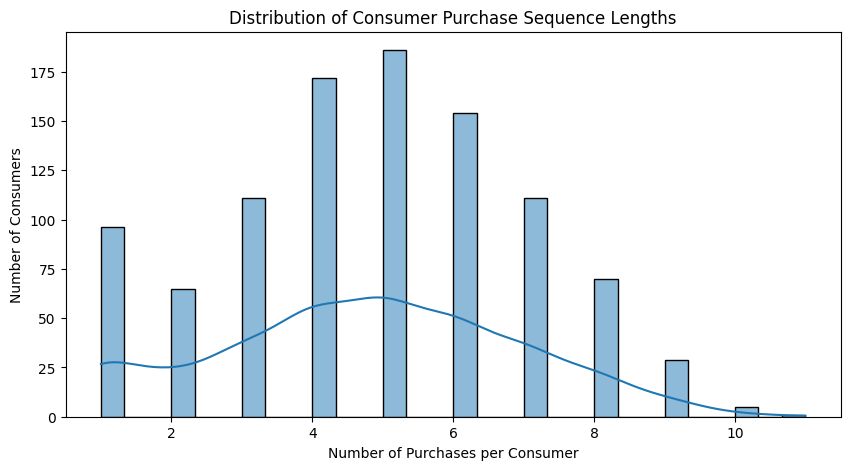

In [26]:
# Plot distribution of sequence lengths
plt.figure(figsize = (10, 5))
sns.histplot(consumer_purchase_counts, bins = 30, kde = True)
plt.xlabel("Number of Purchases per Consumer")
plt.ylabel("Number of Consumers")
plt.title("Distribution of Consumer Purchase Sequence Lengths")
plt.show()

#### Correlation Between Sequence Length and Fit Outcome

In [27]:
# Compute how many times each consumer has each fit outcome
fit_outcome_counts = transaction_df.groupby("consumer_id")["fit_outcome"].value_counts().unstack(fill_value=0)

# Add sequence length (total number of purchases per consumer)
fit_outcome_counts["sequence_length"] = transaction_df["consumer_id"].value_counts()

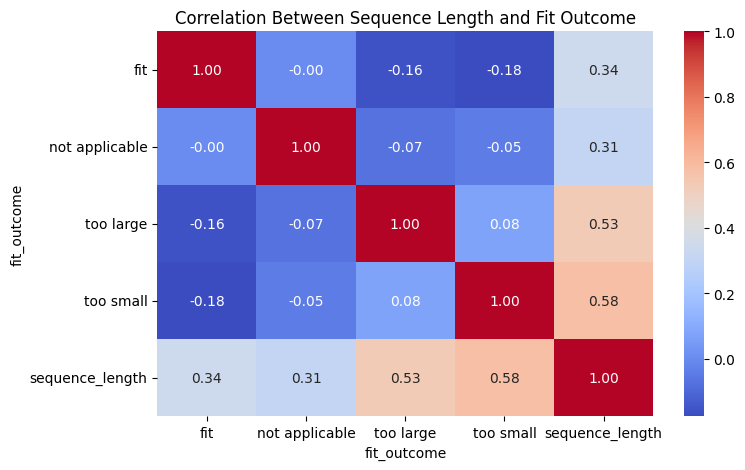

In [28]:
# Compute correlation matrix
correlation_matrix = fit_outcome_counts.corr()

# Display correlation heatmap
plt.figure(figsize = (8, 5))
sns.heatmap(correlation_matrix, annot = True, cmap = "coolwarm", fmt = ".2f")
plt.title("Correlation Between Sequence Length and Fit Outcome")
plt.show()

In [29]:
# Summarize trends by grouping consumers into bins based on sequence length
fit_outcome_counts.groupby(pd.cut(fit_outcome_counts["sequence_length"], bins = [0, 2, 5, 8, 12]), observed = True).mean()

fit_outcome,fit,not applicable,too large,too small,sequence_length
sequence_length,,,,,
"(0, 2]",0.260870,0.180124,0.440994,0.521739,1.403727
"(2, 5]",0.810235,0.477612,1.226013,1.646055,4.159915
"(5, 8]",1.241791,0.808955,2.092537,2.605970,6.749254
"(8, 12]",1.971429,1.171429,2.771429,3.285714,9.200000


Consumers with 9+ purchases have nearly 3 "too small" or "too large" fit issues. Consumers with fewer than 3 purchases tend to report fewer fit issues, likely due to fewer overall transactions.

#### Gender-Based Size Distributions

In [30]:
# Ensure purchased_size is treated as a string
transaction_df["purchased_size"] = transaction_df["purchased_size"].astype(str)

# Merge transaction_df with consumer_features to get gender information
merged_df = transaction_df.merge(consumer_features[['consumer_id', 'gender']], on = 'consumer_id', how = 'left')

# Define clothing sizes (categorical) and shoe sizes (numerical)
clothing_sizes = {"2XS", "XS", "S", "M", "L", "XL", "2XL"}
shoes_sizes = set(merged_df["purchased_size"]) - clothing_sizes  # Anything not in clothing_sizes

# Create two separate dataframes
clothing_df = merged_df[merged_df["purchased_size"].isin(clothing_sizes)]

# Convert 'purchased_size' to a categorical variable with the specified order
clothing_df["purchased_size"] = pd.Categorical(clothing_df["purchased_size"],
                                               categories = SIZES,
                                               ordered = True)

shoe_df = merged_df[merged_df["purchased_size"].isin(shoes_sizes)]

# Convert the shoe sizes to numeric
shoe_df["purchased_size"] = pd.to_numeric(shoe_df["purchased_size"], errors = "coerce")

# Determine the sorted order of unique shoe sizes
shoe_size_order = sorted(shoe_df["purchased_size"].unique())

# Convert 'purchased_size' to a categorical variable with the sorted order
shoe_df["purchased_size"] = pd.Categorical(shoe_df["purchased_size"],
                                           categories = shoe_size_order,
                                           ordered = True)

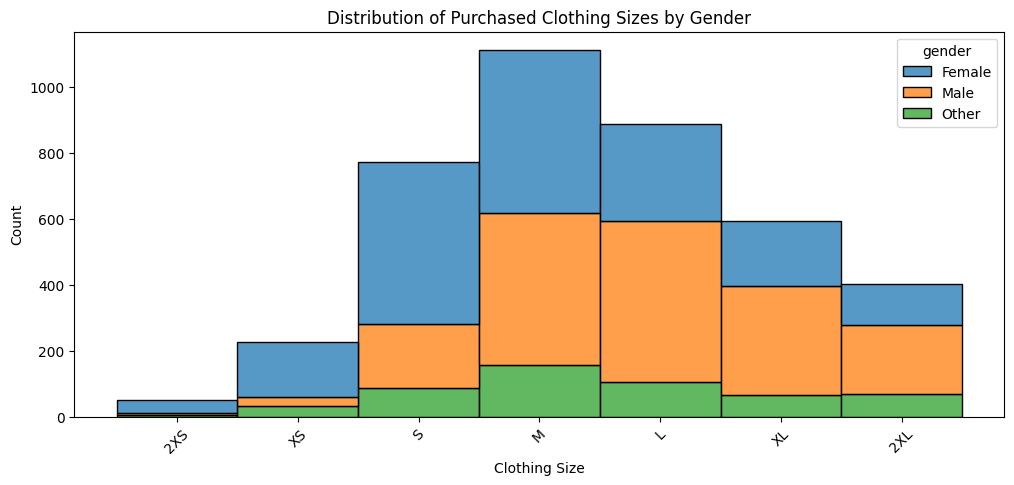

In [31]:
# Plot clothing size distribution by gender
plt.figure(figsize = (12, 5))
sns.histplot(data = clothing_df, x = "purchased_size", hue = "gender", multiple = "stack", discrete = True)
plt.xlabel("Clothing Size")
plt.ylabel("Count")
plt.title("Distribution of Purchased Clothing Sizes by Gender")
plt.xticks(rotation = 45)
plt.show()

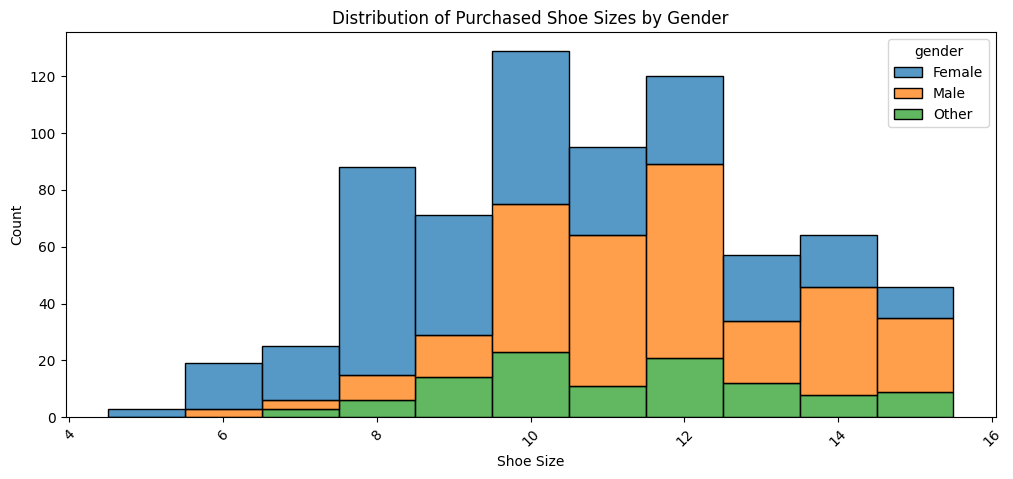

In [32]:
# Plot shoe size distribution by gender
plt.figure(figsize = (12, 5))
sns.histplot(data = shoe_df, x = "purchased_size", hue = "gender", multiple = "stack", bins = shoe_size_order)
plt.xlabel("Shoe Size")
plt.ylabel("Count")
plt.title("Distribution of Purchased Shoe Sizes by Gender")
plt.xticks(rotation = 45)
plt.show()

As expected, females predominantly purchase S and M clothing sizes, while males favor L and XL, with the "Other" category showing a balanced preference for M and L, and 2XS being the least popular size; similarly, females tend to buy smaller shoe sizes (peaking at 7.5, 8.5, and 9.0), males prefer larger sizes (peaking at 9.5, 10.5, and 11.5), and the "Other" category has a more even spread but leans slightly toward smaller sizes, with extreme sizes (4.5, 14.5) being rare

---